# Pymaceuticals Inc.
---

### Analysis
* Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
* Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study. 
* There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

In [189]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st




# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview

In [166]:
combined_results = study_results.merge(mouse_metadata, on='Mouse ID')
combined_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


## Summary Statistics

In [167]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grp = combined_results.groupby('Drug Regimen')['Tumor Volume (mm3)']
# This method is the most straighforward, creating multiple series and putting them all together at the end.
pd.DataFrame({'Mean Tumor Volume':grp.mean(),
              'Median Tumor Volume':grp.median(),
             'Tumor Volume Variance':grp.var(),
             'Tumor Volume Std. Dev':grp.std(),
             'Tumor Volume Std. Err.':grp.sem()})

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [168]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
    
# This method produces everything in a single groupby function
tumor_df = grp.agg(['mean','median','var','std','sem'])
tumor_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

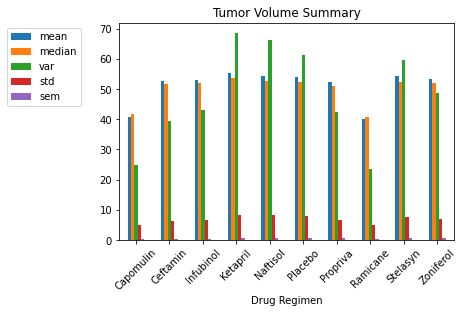

In [169]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
tumor_df.plot(kind='bar',title='Tumor Volume Summary',rot=45).legend(bbox_to_anchor=(-0.1,1))
plt.savefig('Tumor_Volume_Summary.png')

In [170]:
tumor_df.head()

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


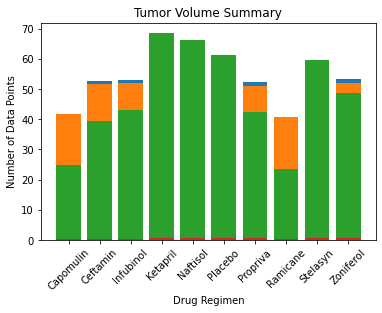

In [190]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(tumor_df.index,tumor_df['mean'])
plt.bar(tumor_df.index,tumor_df['median'])
plt.bar(tumor_df.index,tumor_df['var'])
plt.bar(tumor_df.index,tumor_df['sem'])
plt.xticks(rotation=45)
plt.title('Tumor Volume Summary')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.savefig('Tumor_Volume_Summary.png')

In [172]:
#create a df with just sex and mouse id
m_vs_f_df = pd.DataFrame(combined_results.groupby(['Sex']).count()).reset_index()
m_vs_f_df = m_vs_f_df[['Sex', 'Mouse ID']]
m_vs_f_df = m_vs_f_df.rename(columns={'Mouse ID':'Count'})
m_vs_f_df

,Sex,Count
0,Female,935
1,Male,958


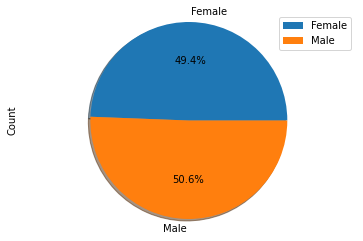

In [191]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
m_vs_f_df.plot(kind='pie',labels=['Female', 'Male'], y = 'Count' ,autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.savefig('Male vs Female.png')

## Quartiles, Outliers and Boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# Quantitatively determine capomulin outliers


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [174]:
max_tumor = combined_results.groupby('Mouse ID')['Timepoint'].max()
merged_data =combined_results.merge(max_tumor, on=['Mouse ID','Timepoint'])
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25


In [175]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    tumor_vol_list.append(final_tumor_vol)
    
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")
    
   

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 29    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


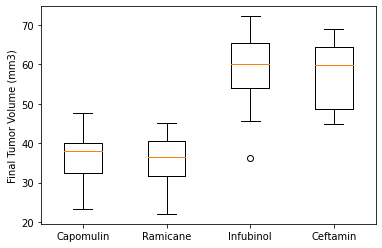

<Figure size 432x288 with 0 Axes>

In [192]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
plt.boxplot(tumor_vol_list, labels = treatment_list)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()
plt.savefig('Final_Volume_Summary.png')

## Line and Scatter Plots

In [143]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#create DF for Capomulin
capomulin_df = combined_results.loc[combined_results['Drug Regimen']=='Capomulin']

In [142]:
#select one mouse to create a plot on
capomulin_b128 = capomulin_df.loc[capomulin_df['Mouse ID'] == 'b128']

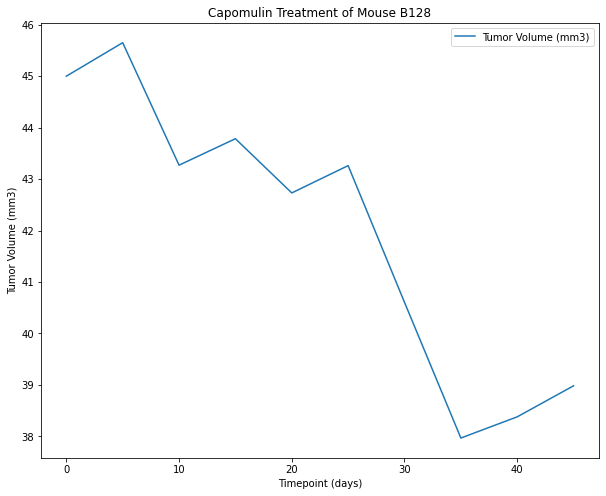

In [193]:
#single data for TP and TV
capomulin_b128 = capomulin_b128.loc[:,['Timepoint', 'Tumor Volume (mm3)']]
capomulin_b128 = capomulin_b128.reset_index(drop=True)

#plot graph
capomulin_b128.set_index('Timepoint').plot(figsize=(10,8))

#give title and labels
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse B128")
plt.savefig('Capomulin Treatment.png')

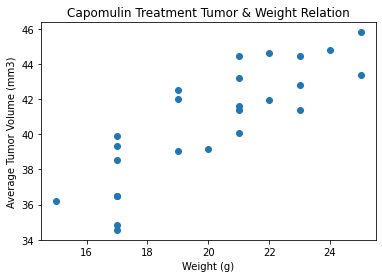

<Figure size 432x288 with 0 Axes>

In [194]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_w_vs_at = capomulin_df.loc[:,['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]

#get the avg for TV and place if DF
capomulin_avg = pd.DataFrame(capomulin_w_vs_at.groupby(['Mouse ID', 'Weight (g)'])['Tumor Volume (mm3)'].mean())

#reset index
capomulin_avg.reset_index(inplace=True)

#sort values
capomulin_avg = capomulin_avg.sort_values(['Weight (g)'], ascending=True)


#plot graph
plt.scatter(capomulin_avg['Weight (g)'],  capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Capomulin Treatment Tumor & Weight Relation')
plt.show()
plt.savefig('Capomulin Treatment scatter Weight.png')



## Correlation and Regression

In [179]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

mouse_weight = capomulin_avg.iloc[:,0]
average_tumor_volume = capomulin_avg.iloc[:,1]
correlation = st.pearsonr(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])


print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume is 0.84


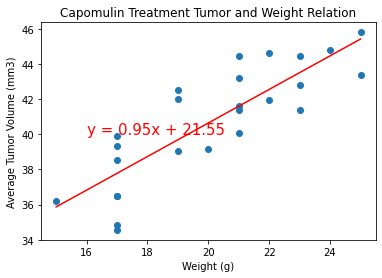

<Figure size 432x288 with 0 Axes>

In [196]:
#add linear reg
from scipy.stats import linregress
x_values = capomulin_avg['Weight (g)']
y_values = capomulin_avg['Tumor Volume (mm3)']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,40),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Capomulin Treatment Tumor and Weight Relation')
plt.show()
plt.savefig('Capomulin Treatment scatter_linear Weight.png')

In [ ]:
#* Look across all previously generated figures and tables 
#and write at least three observations or inferences that can 
#be made from the data. 
#Include these observations at the top of notebook.

#1.) Based off all the tables on Capomulin it seems that as the weight goes up in mice the average tumor volume also rises.
#2.) Between 20 and 30 days there is a large drop in tumor volume but after about 35 days it goes back up.
#3.) Infubinol has the highest tumor volume out of Capomulim, Ramicane, and Ceftamin and it also seems to have the only outlier. All the other drugs do not have any outliers.
